In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15,9]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
def accepter(url : str):
    dataframe = pd.read_excel(url)
    dataframe = dataframe.iloc[:,:2]
    dataframe['Date'] = pd.to_datetime(dataframe['Datetime']).dt.date
    dataframe.set_index('Date',inplace=True)
    dataframe.drop(['Datetime'],axis=1,inplace=True)
    dataframe.index = pd.to_datetime(dataframe.index)
    return dataframe

<b>Total Data : 563</b><br>
<b>Range Time : 2020-03-01 - 2021-09-14</b><br>
<b>Location : DKI Jakarta</b>

### Exploratory Data Analysis

In [3]:
data = ['COVID/Data_kasus2.xlsx','COVID/Data_dirawat2.xlsx',
        'COVID/Data_meninggal2.xlsx','COVID/Data_sembuh2.xlsx']

kasus, rawat, meninggal, sembuh = [accepter(dt) for dt in data]

case = kasus['DKI_JAKARTA'].tolist()
stay = rawat['DKI_JAKARTA'].tolist()
died = meninggal['DKI_JAKARTA'].tolist()
heal = sembuh['DKI_JAKARTA'].tolist()

jakarta = pd.DataFrame(data={
    'Kasus':case,'Dirawat':stay,'Meninggal':died,'Sembuh':heal
}, index=kasus.index)

jakarta.head()

,Kasus,Dirawat,Meninggal,Sembuh
Date,,,,
2020-03-01,2,2.0,0,0
2020-03-02,2,2.0,0,0
2020-03-03,2,2.0,0,0
2020-03-04,2,2.0,0,0
2020-03-05,0,-1.0,1,0


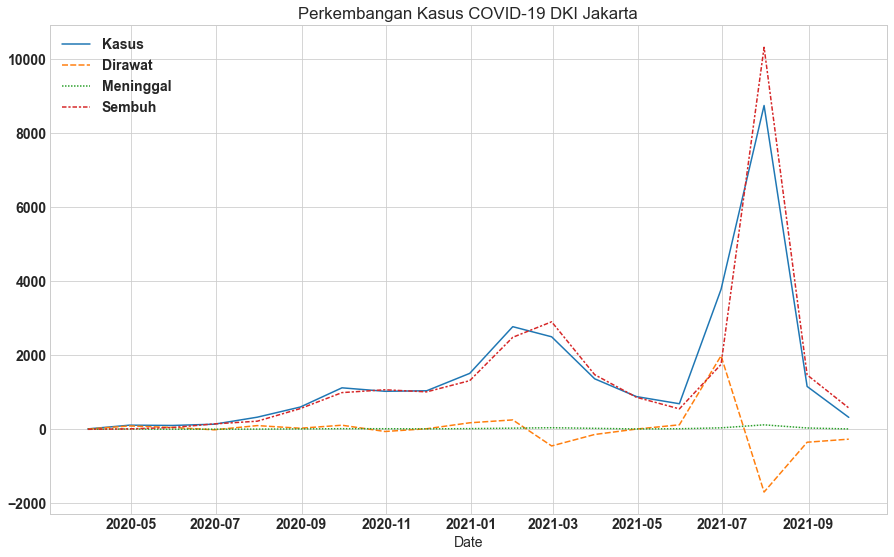

In [4]:
monthly = jakarta.resample('M').mean()
ax = sns.lineplot(data=monthly)
ax.set_title("Perkembangan Kasus COVID-19 DKI Jakarta")
plt.show()

In [5]:
max_case = jakarta[jakarta['Kasus'] == jakarta['Kasus'].max()]['Kasus']

print(max_case)

Date
2021-07-12    14622
Name: Kasus, dtype: int64


<b>Penambahan Kasus Terbanyak Terjadi pada 12 July 2021, sebanyak 14.622 kasus</b>

In [6]:
max_stay = jakarta[jakarta['Dirawat'] == jakarta['Dirawat'].max()]['Dirawat']

print(max_stay)

Date
2021-07-14    9540.0
Name: Dirawat, dtype: float64


<b>Penambahan Angka Dirawat Terjadi pada 14 July 2021, sebanyak 9.540 kasus<br>Hal ini berkaitan dengan terjadinya penambahan sebanyak 14.622 pasien COVID-19 pada tanggal 12 July 2021</b>

In [7]:
min_stay = jakarta[jakarta['Dirawat'] == jakarta['Dirawat'].min()]['Dirawat']

print(min_stay)

Date
2021-07-26   -12150.0
Name: Dirawat, dtype: float64


In [8]:
max_heal = jakarta[jakarta['Sembuh'] == jakarta['Sembuh'].max()]['Sembuh']

print(max_heal)

Date
2021-07-11    20602
Name: Sembuh, dtype: int64


In [9]:
max_dead = jakarta[jakarta['Meninggal'] == jakarta['Meninggal'].max()]['Meninggal']

print(max_dead)

Date
2021-07-20    268
Name: Meninggal, dtype: int64
